$\textbf{ANÁLISIS DE RESONANCIA DEL OSCILADOR ARMONICO}$

Roberto Antonio Cuellar Lozano

Se parte del esquema de la figura acontinuación:

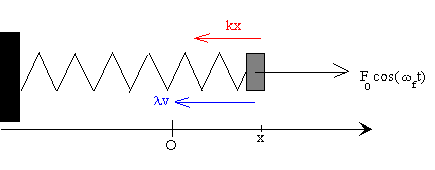

La figura muestra un oscilador armónico amortiguado con una fuerza impusora externa armónica $F_{0}\cos{(w_{f}t)}$. El sistema es amortiguado debido al rosamiento modelado por la expresión $|F_{r}|=\lambda v$, donde $v$ es la velocidad del bloque de masa $m$(recordar que este modelo lineal para la fuerza de rozamiento es valido cuando las velocidades son pequeñas)

Utilizando la segunda ley de Newton se encuentra la ecuación diferencial que modela la situación física:


 $\ddot{x}+2\beta \dot{x}+w_{0}^{2}x=F_{0}\cos{(w_{f}t)}$, con $\beta=\frac{\lambda}{2m}$ (Factor de amortiguamiento) y $w_{0}^{2}=\frac{k}{m}$ (Frecuencia natural del sistema)

Se puede hallar solución a esta ecuación de forma analítica o numérica. La solución analítica está dada por:


$x(t)= \underbrace{H\exp{(-\beta t)}\cos{\left(\sqrt{w_{0}^{2}-\beta^{2}}t+\alpha \right)}}_{Solucion~Homogenea} + \underbrace{A \cos(w_{f}t+\phi) }_{Solucion~no~homogenea~estacionaria}$

$H$ y $\alpha$ son determinados por las condiciones iniciales del fenómeno, mientras que $A=\frac{F_{0}/m}
{\sqrt{(w_{f}^{2}-w_{0}^{2})^{2}+(2\beta w_{f})^{2}}}$ y $\tan{\phi}= \frac{w_{f}^{2}-w_{0}^{2}}{2\beta w_{f}}$

La potencia media cedida por la fuente externa está dada por:

 $P_{m}=\frac{F_{0}^{2}\beta w_{f}^{2}/m}
{(w_{f}^{2}-w_{0}^{2})^{2}+(2\beta w_{f})^{2}}$

El factor de calidad es una medida de cuan agudo es el ancho de de banda de resonancia del sistema, y se puede determinar a partir de los parámetros del sistema resonante o a partir de la curva caracteristica de la potencia media. Los factores de calidad se pueden entonces determinar de las siguientes formas: 

$Q = \frac{w_{0}}{2\beta} = \frac{w_{0}}{\Delta w}$, donde $\Delta w$ representa el ancho de banda a la mitad de la amplitud del pico

Se asume que se realizó un experimento en el cual se midió la potencia media suministrada al oscilador arrojando los siguientes datos:

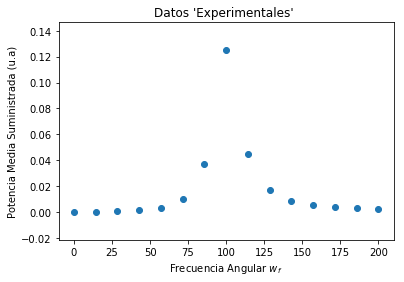

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
from scipy import linspace

# carga del archivo .dat del detector
datos = np.array(loadtxt("datos_for.dat"))
wf = datos[:,0]
a = datos[:,1]
plt.scatter(wf,a)
plt.xlabel("Frecuencia Angular $w_{f}$")
plt.ylabel("Potencia Media Suministrada (u.a)")
plt.title("Datos 'Experimentales' ")
plt.show()

Se procede a realizar un código para determinar el factor Q a partir de los datos del experimento, y posteriormente extraer de este los parámetros del sistema $\lambda,~\beta,~w_{0}$ y $k$ 

Se realizará primero un código utilizando interpolación de lagrange para ajustar una función a los datos

In [12]:
# la siguiente clase realiza la interpolación de lagrange para los datos que se le ingresen
# regresa un arreglo de tamaño len(x_interp) 
class lagrange:

    def interpolacion(self,xm,ym, x_interp):
        #print(xm,ym,x_interp)
        n = len(xm)
        ele = 1.
        y = 0.
        y_interp = []
        for x in range(len(x_interp)):
            #print(x_interp[x]) 
            y = 0.
            for j in range(len(ym)):
               
                ele = 1.
                for m in range(len(ym)):
                    if m != j:
                        #print(x_interp[x]-xm[m])
                        #print((x_interp[x]-xm[m])/(xm[j]-xm[m]))
                        ele *=(x_interp[x]-xm[m])/(xm[j]-xm[m]) 
                        
                        #print(ele)
                y += ele*ym[j]
            
            y_interp.append(y)
       
            
        #print(y_interp)
        return (y_interp)


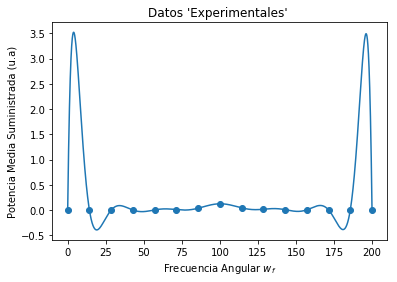

In [13]:
rango_interp = linspace(min(wf),max(wf),10000) # vector dominio interpolación
interpo = lagrange()
fun = np.array(interpo.interpolacion(wf,a,rango_interp))
plt.scatter(wf,a)
plt.plot(rango_interp, fun)
plt.xlabel("Frecuencia Angular $w_{f}$")
plt.ylabel("Potencia Media Suministrada (u.a)")
plt.title("Datos 'Experimentales' ")
plt.show()

De la gráfica anterior no se puede tener certeza de que el ajuste de curva si tenga sentído físico, ya que como se observa , el poliminio de ajuste debido a la interpolación de lagrange presenta 2 picos que se salen de la tendencia de los datos, por lo que para corroborar si la interpolación mediante el método de lagrange es correcta, se procede a realizar una interpolación usando splines cúbicos


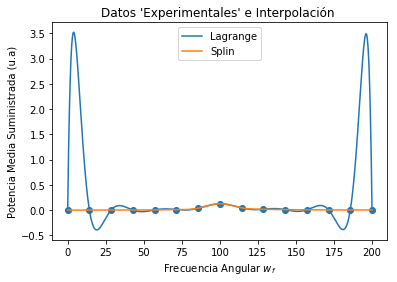

In [16]:
from scipy.interpolate import interp1d # método dentro de scipy para interpolación
y = np.array(interp1d(wf,a,kind=('cubic'))(rango_interp)) 
plt.scatter(wf,a)
lag, = plt.plot(rango_interp, fun, label='Lagrange')
splin, = plt.plot(rango_interp, y, label ='Splin')
plt.xlabel("Frecuencia Angular $w_{f}$")
plt.ylabel("Potencia Media Suministrada (u.a)")
plt.title("Datos 'Experimentales' e Interpolación ")
plt.legend(handles=[lag, splin])
plt.show()

Tal y como se vé en la fígura anterior, la interpolación de lagrange se sale totalmente de la realidad física para los extremos de los datos interpolados, esto se debe a que el número de datos indíca también el órden del polinimio de ajuste obtenido, en este caso fueron 15 datos, por lo que el polinómio es de grado 14, lo que genera estos picos inconsistentes. Por ello se utilizarán únicamente los datos interpolados utilizando los splines cúbicos.

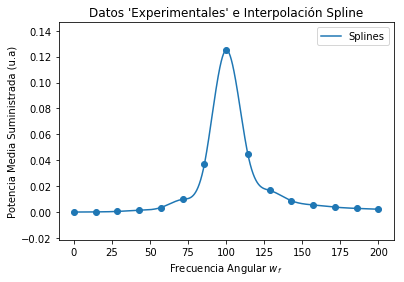

In [17]:
plt.scatter(wf,a)
splin, = plt.plot(rango_interp, y, label ='Splines')
plt.xlabel("Frecuencia Angular $w_{f}$")
plt.ylabel("Potencia Media Suministrada (u.a)")
plt.title("Datos 'Experimentales' e Interpolación Spline")
plt.legend(handles=[splin])
plt.show()

Para determinar el factor de calidad Q, se necesita hallar el valor de $w_{f}$ donde se encuentra el valor máximo de la potencia media, es justo en este valor donde se encuentra la frecuencia natural del sistema $w_{0}$, cuando la fuente externa alcanza esta frecuencia, el sistema se dice que entra en resonancia.

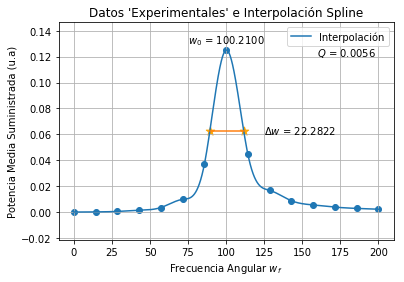

In [30]:
maximo = np.amax(y)
indice_max = np.argmax(y)
tr = rango_interp[indice_max]
indice = []
ajuste = ((maximo-y[0])/2)*0.002 # Tolerancia al valor medio 
for i in range(len(y)):
    if y[i] >= ((maximo-y[0])/2)-ajuste and y[i] <= ((maximo-y[0])/2)+ajuste:
        indice.append(i) 
r = len(indice)
plt.scatter(wf,a)
splin, = plt.plot(rango_interp, y, label ='Interpolación')
plt.scatter(rango_interp[indice[0]], y[indice[0]] , marker='*',facecolor ='orange',s = 80)
plt.scatter(rango_interp[indice[r-1]],y[indice[r-1]] , marker='*',facecolor ='orange',s = 80)
im = np.linspace(rango_interp[indice[0]],rango_interp[indice[r-1]],100)
so = y[indice[r-1]]*np.ones(100, dtype = int)
plt.plot(im,so)
deltaw = rango_interp[indice[r-1]]-rango_interp[indice[0]] #ancho de banda
q= maximo/deltaw
plt.xlabel("Frecuencia Angular $w_{f}$")
plt.ylabel("Potencia Media Suministrada (u.a)")
plt.title("Datos 'Experimentales' e Interpolación Spline")
plt.legend(handles=[splin])
plt.grid("on")
plt.text(125, 0.06, r'$\Delta w$ = %0.4f '%(deltaw), fontsize=10)
plt.text(75, 0.13, r'$w_{0}$ = %0.4f '%(tr), fontsize=10)
plt.text(160, 0.12, r'$Q$ = %0.4f '%(q), fontsize=10)
plt.show()

De la gráfica obtenida se determinó el factor de calidad $Q=4.4973$, y $w_{0}=100.21[rad/s]$, por lo que usando las definiciones iniciales, se encuentra que $\beta = 11.1411[rad/s]$, el experimento especifica que la masa usada fué $m= 5kg$, por lo tanto $\lambda = 111,141[kg rad/s]$. La constante de elasticidad del resorte encontrada fué $k = 50000 [kg/s^{2}]$.

Ya que los datos experimentales se obtuvieron a partir de un mini-modelo computacional con parámetros específicos, es posible compararlos con los obtenidos usando la interpolación, resultando en $\beta_{teorico}= 10[rad/s]$, $w_{0,teorico}= 100[rad/s]$, por lo que sus respectivos errores fueron de 11.4% para el $\beta$ y  0.21% para el $w_{0}$